In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/Study/BML_Project/ThucHanhCreditScoring/Project")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Load in our libraries
import pandas as pd
import numpy as np
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import SelectFromModel, SelectKBest
from sklearn.pipeline import make_pipeline
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier

sns.set(style='white', context='notebook', palette='deep')
pd.options.display.max_columns = 100
from transform_data import transform_data

In [3]:
import pandas as pd
import numpy as np

kaggle_data = pd.read_csv("./data/cs-training.csv")
kaggle_data.drop(['Unnamed: 0'], axis=1, inplace=True)
process_data = transform_data(kaggle_data)
process_data.head()

,SeriousDlqin2yrs,UnknownNumberOfDependents,UnknownMonthlyIncome,NoDependents,NoIncome,ZeroDebtRatio,UnknownIncomeDebtRatio,WeirdRevolvingUtilization,ZeroRevolvingUtilization,Log.Debt,RevolvingLines,HasRevolvingLines,HasRealEstateLoans,HasMultipleRealEstateLoans,EligibleSS,DTIOver33,DTIOver43,DisposableIncome,RevolvingToRealEstate,NumberOfTime30-59DaysPastDueNotWorseLarge,NumberOfTime30-59DaysPastDueNotWorse96,NumberOfTime30-59DaysPastDueNotWorse98,Never30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorseLarge,NumberOfTime60-89DaysPastDueNotWorse96,NumberOfTime60-89DaysPastDueNotWorse98,Never60-89DaysPastDueNotWorse,NumberOfTimes90DaysLateLarge,NumberOfTimes90DaysLate96,NumberOfTimes90DaysLate98,Never90DaysLate,IncomeDivBy10,IncomeDivBy100,IncomeDivBy1000,IncomeDivBy5000,Weird0999Utilization,FullUtilization,ExcessUtilization,NumberOfTime30-89DaysPastDueNotWorse,Never30-89DaysPastDueNotWorse,NeverPastDue,Log.RevolvingUtilizationTimesLines,Log.RevolvingUtilizationOfUnsecuredLines,DelinquenciesPerLine,MajorDelinquenciesPerLine,MinorDelinquenciesPerLine,DelinquenciesPerRevolvingLine,MajorDelinquenciesPerRevolvingLine,MinorDelinquenciesPerRevolvingLine,Log.DebtPerLine,Log.DebtPerRealEstateLine,Log.DebtPerPerson,RevolvingLinesPerPerson,RealEstateLoansPerPerson,YearsOfAgePerDependent,Log.MonthlyIncome,Log.IncomePerPerson,Log.IncomeAge,Log.NumberOfTimesPastDue,Log.NumberOfTimes90DaysLate,Log.NumberOfTime30-59DaysPastDueNotWorse,Log.NumberOfTime60-89DaysPastDueNotWorse,Log.Ratio90to30-59DaysLate,Log.Ratio90to60-89DaysLate,AnyOpenCreditLinesOrLoans,Log.NumberOfOpenCreditLinesAndLoans,Log.NumberOfOpenCreditLinesAndLoansPerPerson,Has.Dependents,Log.HouseholdSize,Log.DebtRatio,Log.DebtPerDelinquency,Log.DebtPer90DaysLate,Log.UnknownIncomeDebtRatio,Log.UnknownIncomeDebtRatioPerPerson,Log.UnknownIncomeDebtRatioPerLine,Log.UnknownIncomeDebtRatioPerRealEstateLine,Log.UnknownIncomeDebtRatioPerDelinquency,Log.UnknownIncomeDebtRatioPer90DaysLate,Log.NumberRealEstateLoansOrLines,LowAge,Log.age
0,1,0,0,0,0,0,0,0.0,0,8.898802,7,1,1,1,0,1,1,1796.802984,1.0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,2,0,0,1.850482,-0.266408,0.153846,0.0,0.153846,0.285714,0.0,0.285714,6.259745,6.952892,7.800190,2.333333,2.0,15.0,9.118225,8.019613,5.289584,0.693147,0.0,0.693147,0.0,-0.693147,0.0,1,2.564949,1.466337,1,1.098612,-0.219423,7.800190,8.898802,0.0,-1.098612,-2.639057,-1.945910,-1.098612,0.000000,1.791759,0,3.332205
1,0,0,0,0,0,0,0,0.0,0,5.758517,4,1,0,0,0,0,0,2283.121877,4.0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1.574557,-0.043794,0.000000,0.0,0.000000,0.000000,0.0,0.000000,4.149079,5.758517,5.065370,2.000000,0.0,20.0,7.863267,7.170120,4.149695,0.000000,0.0,0.000000,0.0,0.000000,0.0,1,1.386294,0.693147,1,0.693147,-2.104749,5.758517,5.758517,0.0,-0.693147,-1.609438,0.000000,0.000000,0.000000,0.000000,0,3.135494
2,0,0,0,1,0,0,0,0.0,0,5.556499,2,1,0,0,0,0,0,2783.085113,2.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.839997,-0.418277,1.000000,0.5,0.500000,1.000000,0.5,0.500000,4.457887,5.556499,5.556499,2.000000,0.0,38.0,8.020270,8.020270,4.356709,0.693147,0.0,0.000000,0.0,0.000000,0.0,1,0.693147,0.693147,0,0.000000,-2.463771,4.457887,4.863352,0.0,0.000000,-1.098612,0.000000,-1.098612,-0.693147,0.000000,0,3.044522
3,0,0,0,1,0,0,0,0.0,0,4.778821,5,1,0,0,0,0,0,3181.036049,5.0,0,0,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,1,0.774289,-1.453247,0.000000,0.0,0.000000,0.000000,0.0,0.000000,2.987061,4.778821,4.778821,5.000000,0.0,30.0,8.101678,8.101678,4.667691,0.000000,0.0,0.000000,0.0,0.000000,0.0,1,1.609438,1.609438,0,0.000000,-3.322857,4.778821,4.778821,0.0,0.000000,-1.791759,0.000000,0.000000,0.000000,0.000000,0,2.564949
4,0,0,0,1,0,0,0,0.0,0,7.368324,6,1,1,0,0,0,0,62003.024906,3.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1.863062,-0.097349,0.142857,0.0,0.142857,0.166667,0.0,0.166667,5.288882,6.675177,7.368324,6.000000,1.0,49.0,11.060180,11.060180,7.148157,0.000000,0.0,0.000000,0.0,0.000000,0.0,1,1.945910,1.945910,0,0.000000,-3.691856,6.675177,7.368324,0.0

In [7]:
k_list_2 = []
inert_list_2 = []
from sklearn.cluster import KMeans
for k in range (1, 20):
 
	# Create a kmeans model on our data, using k clusters.  random_state helps ensure that the algorithm returns the same results each time.
  kmeans_model = KMeans(n_clusters=k, random_state=1).fit(process_data.loc[:, process_data.columns != 'SeriousDlqin2yrs'])
	
	# These are our fitted labels for clusters -- the first cluster has label 0, and the second has label 1.
	# labels = kmeans_model.labels_
 
	# Sum of distances of samples to their closest cluster center
  inertia = kmeans_model.inertia_
  k_list_2.append(k)
  inert_list_2.append(inertia)
  print("k:",k, " cost:", inertia)

k: 1  cost: 26692462876616.53
k: 2  cost: 13001059661868.238
k: 3  cost: 8415583097190.329
k: 4  cost: 6667329443851.584
k: 5  cost: 5342747699426.5
k: 6  cost: 4158394120369.586
k: 7  cost: 3109690267209.2144
k: 8  cost: 2568268722403.755
k: 9  cost: 2149879140455.6013
k: 10  cost: 1803279681033.1963
k: 11  cost: 1516932335718.401
k: 12  cost: 1267337044591.9756
k: 13  cost: 1124723691087.649
k: 14  cost: 1002326293806.5123
k: 15  cost: 886925122665.7207
k: 16  cost: 790147959602.0906
k: 17  cost: 701149337269.1198
k: 18  cost: 627613347508.6646
k: 19  cost: 545951093599.5617


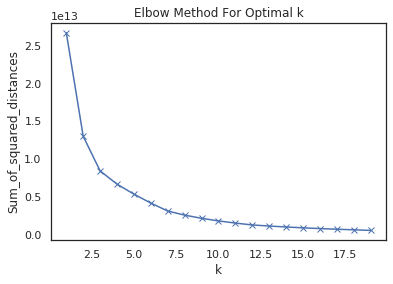

In [8]:
import matplotlib.pyplot as plt
plt.plot(k_list_2, inert_list_2, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [0]:
import numpy as np
from scipy import sparse
matrix_large = np.array([[0,1,2,3,4,0,0,0],[0,1,2,3,4,0,0,0],[0,1,2,3,4,0,0,0]])
matrix_sparse = sparse.csr_matrix(matrix_large)

In [0]:
matrix_large = matrix_large

In [25]:
a = np.array([[1,2,3,4,5,6,7,8,9], [45,5,6,7,43,5,6,45,9]])
a.reshape(3,6)

array([[ 1,  2,  3,  4,  5,  6],
       [ 7,  8,  9, 45,  5,  6],
       [ 7, 43,  5,  6, 45,  9]])

In [19]:
np.median(a)

6.0

In [14]:
np.std(a)

15.018558300502935

In [15]:
np.mean(a)

12.176470588235293

In [5]:
type(matrix_sparse)

scipy.sparse.csr.csr_matrix

In [1]:
pip install spicy

In [0]:
#Optimal k for processed data, class 0: 5, 7